In [1]:
! pip install lime

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from lime import lime_tabular
from google.colab import drive
from lightgbm import LGBMClassifier

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define paths for model and dataset
model_path = '/content/drive/My Drive/IDS models/best_model_lgb'
test_file_path = '/content/drive/My Drive/IDS Dataset 2/NF-ToN-IoT-V2_15000 samples_minmax_normalized_test.csv'

# Load the saved LightGBM model
lgb_model = joblib.load(model_path)

# Load test dataset
test_data = pd.read_csv(test_file_path)
X_test = test_data.iloc[:, :-2]  # Features
y_test = test_data.iloc[:, -1]   # Labels

# Encode labels if necessary
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# y_test_encoded = label_encoder.fit_transform(y_test)
# class_names = label_encoder.classes_  # Retrieve class names

num_classes = y_test.unique()
# Check shapes of data and model predictions
print(f"Feature matrix shape: {X_test.shape}")
print(f"Number of classes: {len(num_classes)}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Mounted at /content/drive
Feature matrix shape: (3003, 41)
Number of classes: 10


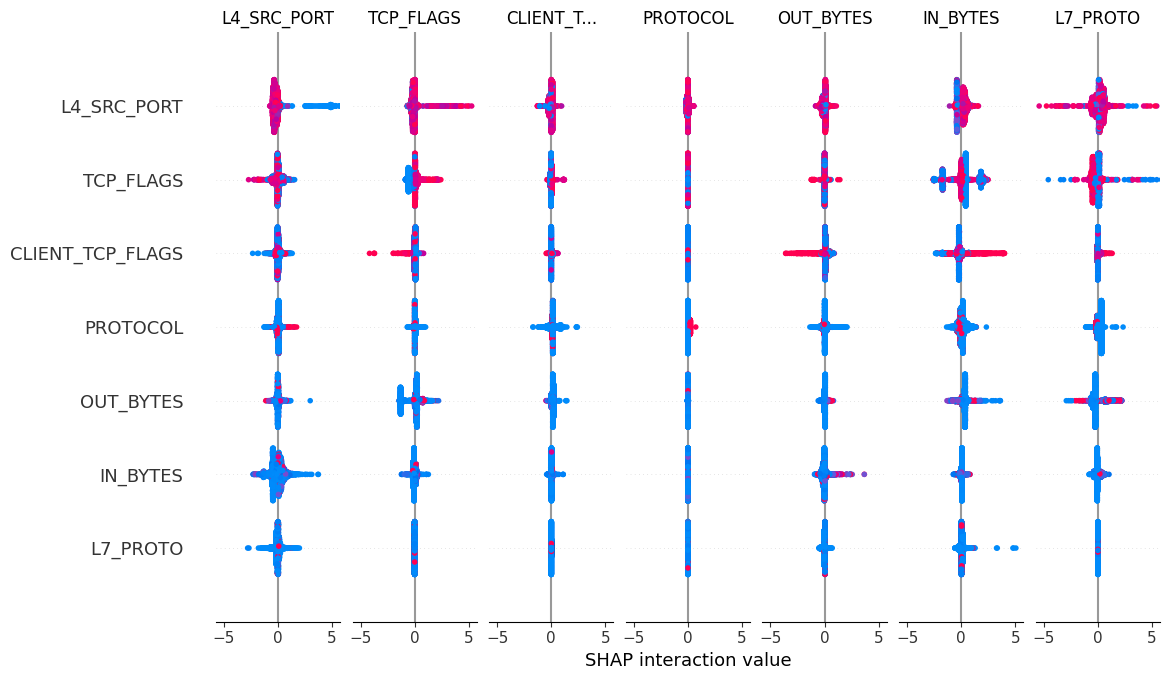

In [3]:
# ---- SHAP Explainability ----
# Initialize SHAP explainer using TreeExplainer (specific to tree-based models like LightGBM)
explainer = shap.TreeExplainer(lgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# ایجاد یک summary plot برای توضیح اهمیت ویژگی‌ها در هر کلاس
# در صورتی که مدل شما چند کلاسه باشد، shap_values شامل مقادیر برای هر کلاس است
shap.summary_plot(shap_values, X_test, plot_type="bar")


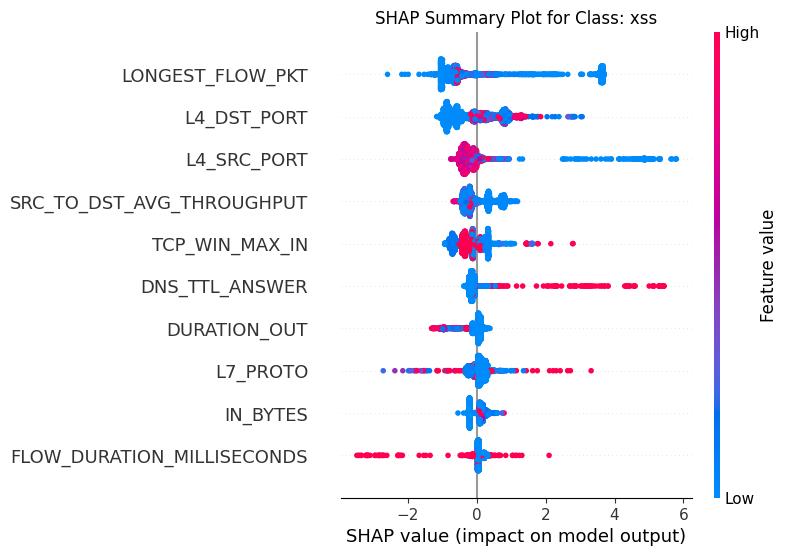

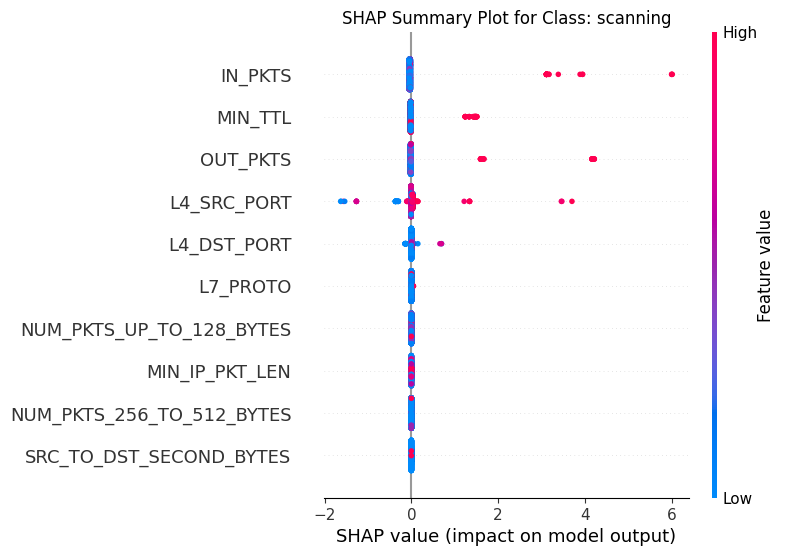

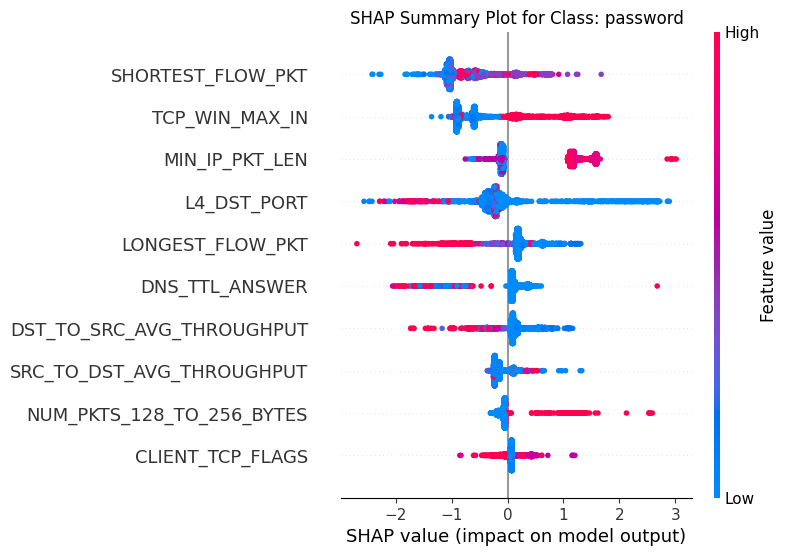

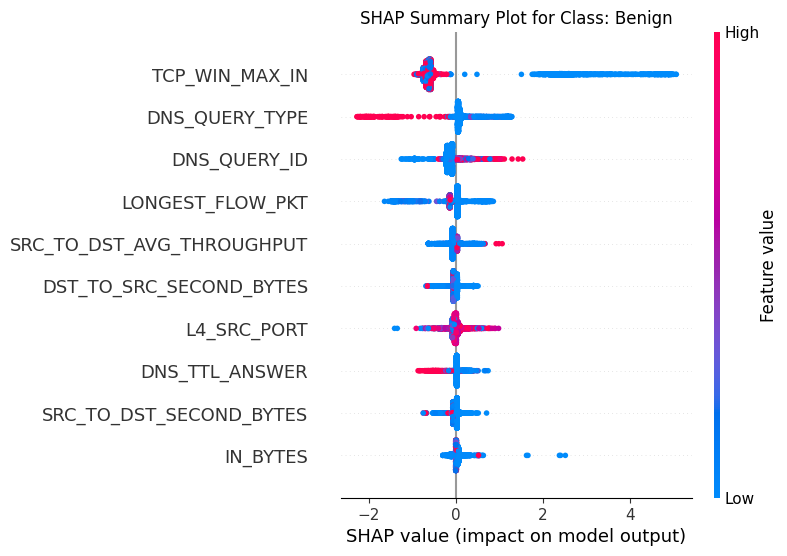

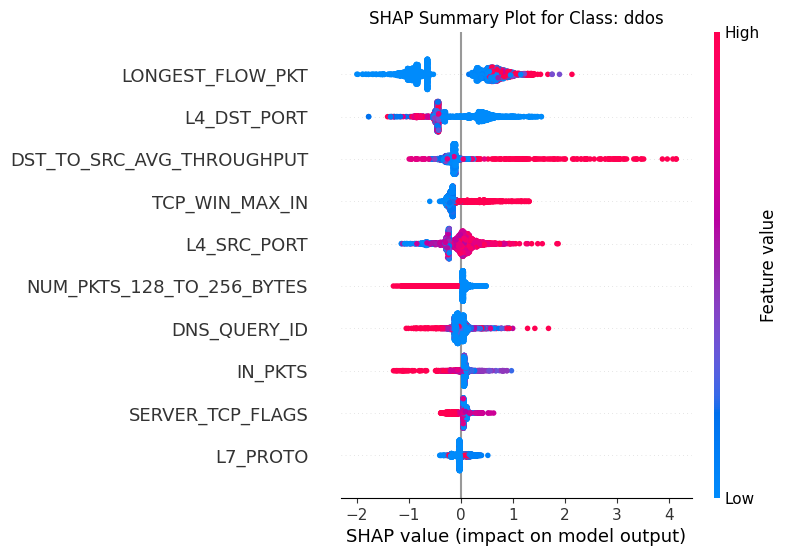

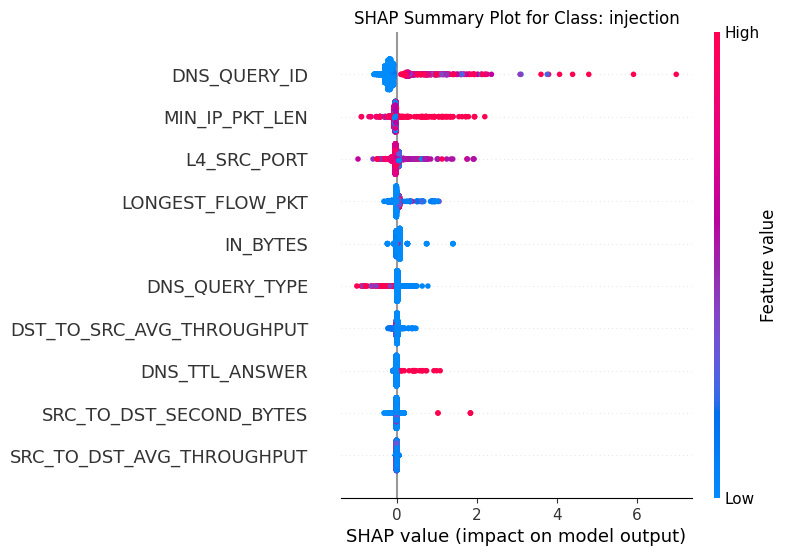

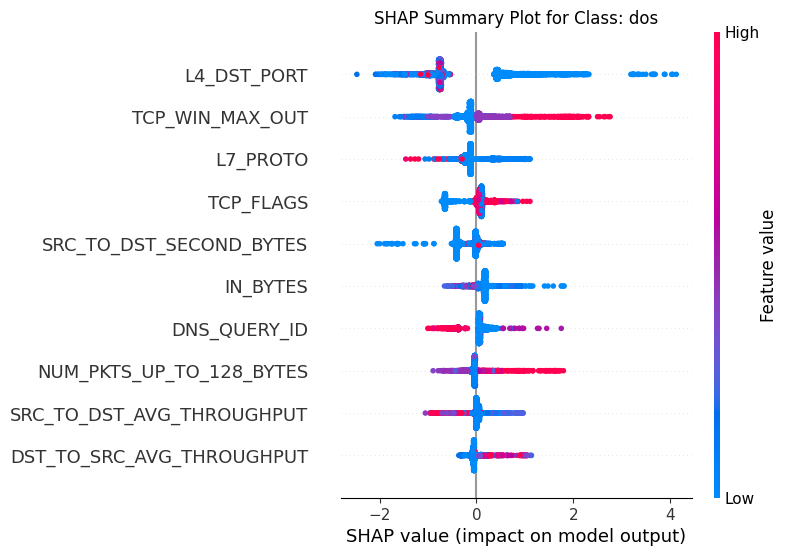

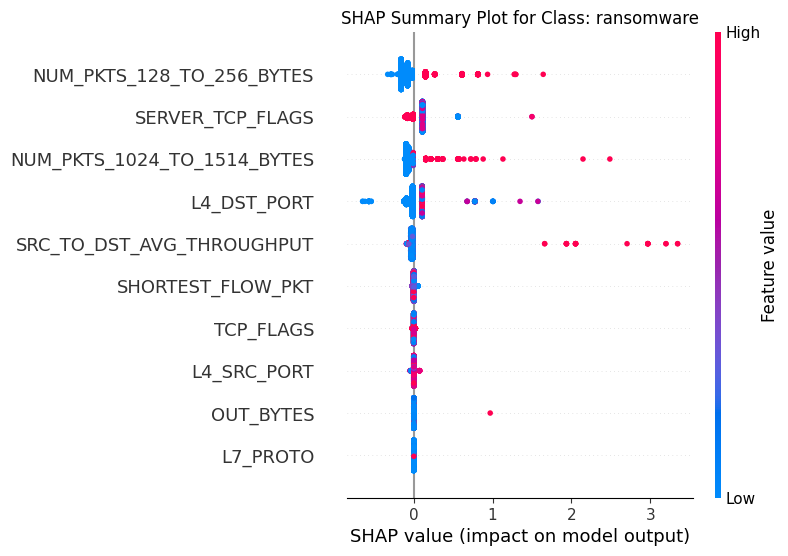

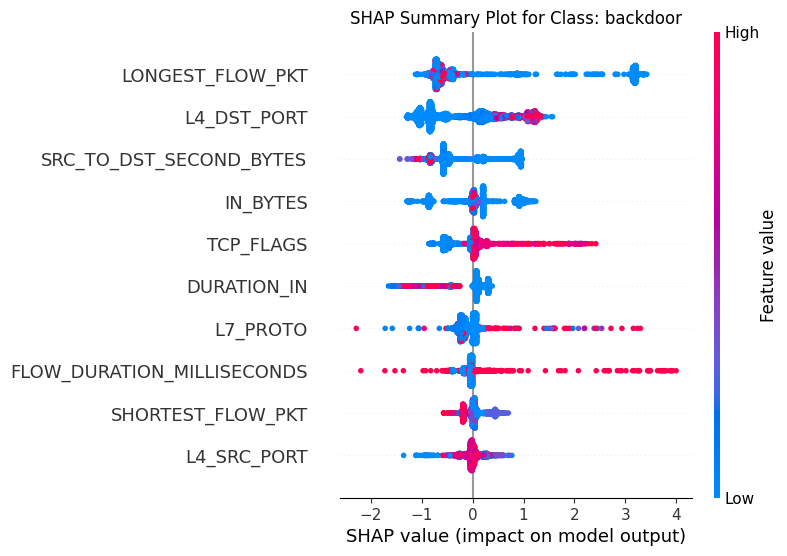

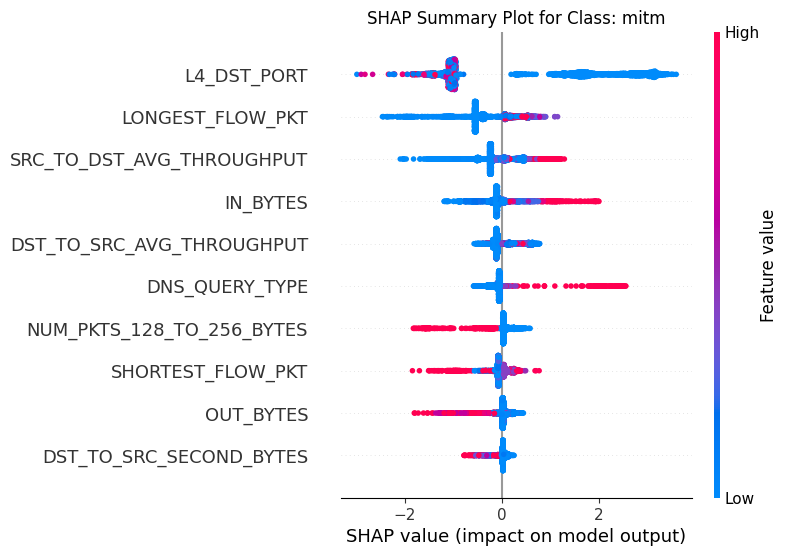

In [5]:

# Plot SHAP summary for each class
for class_index in range(len(num_classes)):
    shap_values_class = shap_values[:,:,class_index]

    # Set figure size before plotting
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed

    shap.summary_plot(
        shap_values_class,
        X_test,
        feature_names=X_test.columns,
        max_display=10,
        show=False
    )
    class_name = num_classes[class_index]
    plt.title(f"SHAP Summary Plot for Class: {class_name}")
    plt.show()

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

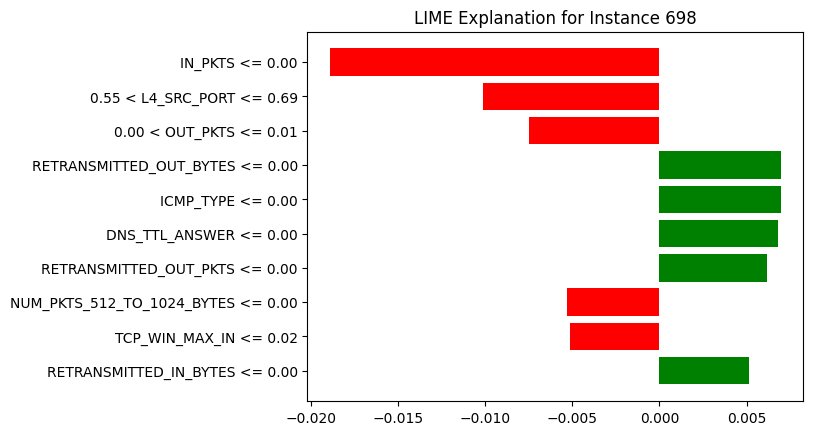

In [6]:
# ---- LIME Explainability ----
# Initialize LIME Tabular Explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test),
    feature_names=X_test.columns,
    class_names=num_classes,
    mode='classification'
)

# Select an instance to explain (e.g., instance 698)
instance_index = 698
if instance_index >= len(X_test):
    instance_index = 0  # Fallback to the first instance if index out-of-bounds

instance_to_explain = X_test.iloc[instance_index]

# Generate LIME explanation for the selected instance
lime_exp = lime_explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=lgb_model.predict_proba
)

# Plot LIME explanation
lime_exp.as_pyplot_figure()
plt.title(f'LIME Explanation for Instance {instance_index}')
plt.show()